In [51]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy import signal
import pyedflib
from pyedflib import highlevel
import os

In [52]:
#Constants 
dataPath = r"C:\Users\Humperdink2\Documents\github\NAThacks\Data\files"
outPath = r"C:\Users\Humperdink2\Documents\github\NAThacks\spec_data\train"
channels = ["C3..", "C4..","CZ..","F4.."]
labels = {
    "T0" : "rest",
    "T1" : ["leftHand", "bothHands"],
    "T2" : ["rightHand", "bothFeet"]
}
frequency = 160
time_period = 640
prc_overlap = .90

KeyboardInterrupt: 

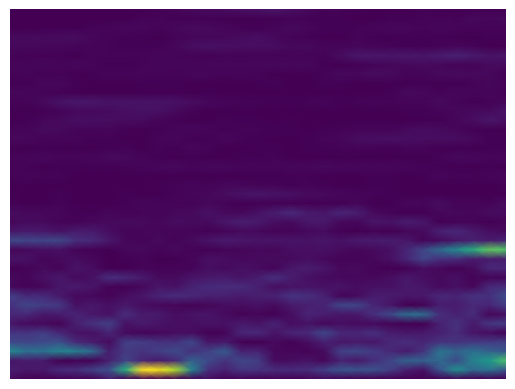

In [69]:
#Generating spectograms

for folder in os.listdir(dataPath)[99:110]:
    for fileName in os.listdir(os.path.join(dataPath,folder)):

        #Skipping files .event files
        if fileName.find("event") != -1:
            continue

        #reading EDF file and extracting 
        filePath = os.path.join(dataPath,folder,fileName)
        annotations = ""
        file = ""

        #Getting the annotations
        file = pyedflib.EdfReader(filePath)  
        annotations = file.readAnnotations()
        file.close()

        signals, signal_headers, header = highlevel.read_edf(filePath, ch_names=channels)
        count = 0
        #Creating Spectogram files
        for i, period in enumerate(annotations[0]):

            #Getting signal data for 4 second period
            data = signals[:,int(annotations[0][i]):int(annotations[0][i]+time_period)]

            f, t, image = signal.spectrogram(data,frequency, nperseg = frequency, noverlap = frequency*prc_overlap)
            image = np.transpose(image,(1,2,0))

            figure = plt.pcolormesh(t, f, image[:,:,0], shading='gouraud')
            plt.ylim(0,40)
            plt.axis('off')

            #Assigning label to file
            label = annotations[2][i]

            #Categories of the different tests
            leftOrRight = ["03","04","07","08","11","12"]
            if label == "T1":
                if any(x == fileName[5:7] for x in leftOrRight):
                    label = labels["T1"][0]
                else: 
                    label = labels["T1"][1]
            elif label == "T2":
                if any(x == fileName[5:7] for x in leftOrRight):
                    label = labels["T2"][0]
                else:
                    label = labels["T2"][1]
            else:
                label = labels["T0"]

            #Naming and saving the file
            file_name = os.path.join(outPath,label, f"{fileName[0:len(fileName)-4]}_{count}.png")
            plt.savefig(file_name, bbox_inches="tight", pad_inches=0)
            count += 1